# Install Requirements

In [13]:
%pip install transformers datasets
%pip install torch
%pip install matplotlib
%pip install umap-learn numba==0.48.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_whe

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load Language Model

In [82]:
#MODEL_NAME = "DTAI-KULeuven/robbertje-1-gb-non-shuffled" # NL MODEL TODO: is the model trained on lowercased data?

MODEL_NAME = "roberta-base"

#MODEL_NAME = "xlm-roberta-base" # cross-lingual mode (https://huggingface.co/xlm-roberta-base)


In [189]:
from transformers import RobertaModel, AutoTokenizer, RobertaPreTrainedModel, BertModel, GPT2Model, pipeline

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
#model = RobertaModel.from_pretrained(MODEL_NAME)

# FIXME: cannot use pipeline for extracting layers other than the last one
model = pipeline('feature-extraction', model=MODEL_NAME, tokenizer=tokenizer)

Downloading: 100%|██████████| 1.36M/1.36M [00:00<00:00, 2.20MB/s]
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Load Data

## SemEval 2020 (C)COHA corpus

### Download

In [217]:
from io import BytesIO
from pathlib import Path
from zipfile import ZipFile
import urllib

SEMEVAL_DATA_URL = "https://www2.ims.uni-stuttgart.de/data/sem-eval-ulscd/semeval2020_ulscd_eng.zip"

DATA_DIR = Path.cwd() / "data"
SEMEVAL2020_DIR = DATA_DIR / "semeval2020_ulscd_eng"

if SEMEVAL2020_DIR.is_dir():
    print(f"Directory '{SEMEVAL2020_DIR}' already exists, skipping corpus download.")
else:
    with urllib.request.urlopen(SEMEVAL_DATA_URL) as f:
        with ZipFile(BytesIO(f.read())) as zipfile:
            zipfile.extractall(DATA_DIR)

assert SEMEVAL2020_DIR.is_dir(), f"Directory does not exist: '{SEMEVAL2020_DIR}'"


In [218]:
CORPUS1_DIR = SEMEVAL2020_DIR / 'corpus1'
CORPUS2_DIR = SEMEVAL2020_DIR / 'corpus2'
TRUTH_DIR = SEMEVAL2020_DIR / 'truth'

assert CORPUS1_DIR.is_dir(), f"Directory does not exist: '{CORPUS1_DIR}'"
assert CORPUS2_DIR.is_dir(), f"Directory does not exist: '{CORPUS2_DIR}'"
assert TRUTH_DIR.is_dir(), f"Directory does not exist: '{TRUTH_DIR}'"


### Read

In [220]:
TOKENS_FILE1 = CORPUS1_DIR / "token" / "ccoha1.txt.gz"
TOKENS_FILE2 = CORPUS2_DIR / "token" / "ccoha2.txt.gz"

assert TOKENS_FILE1.is_file()
assert TOKENS_FILE2.is_file()

In [226]:
import gzip

with gzip.open(TOKENS_FILE1, 'rt') as f:
    sentences_1810 = f.readlines()

assert len(sentences_1810) == 253644

with gzip.open(TOKENS_FILE2, 'rt') as f:
    sentences_1960 = f.readlines()

assert len(sentences_1960) == 353692

In [231]:
plt.hist((len(sentences_1810)))

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

(array([586.,   0.,   0., 424.,   0.,   0., 108.,   0.,   0.,  26.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

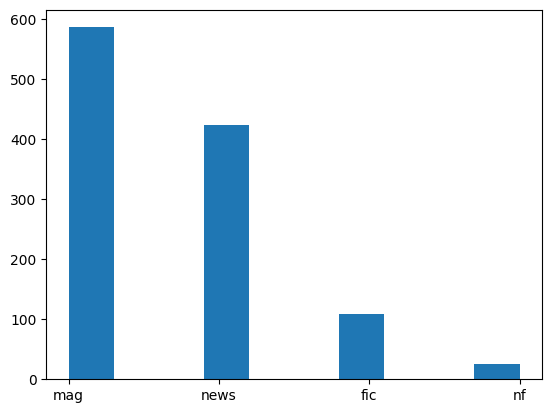

In [166]:
plt.hist([c.genre for c in coha_files])

# Embeddings

## COHA

In [167]:
TERM = 'sustainability'

In [171]:

from tqdm import tqdm


for f in tqdm(coha_files):
    if matches := list(f.find_sentences(TERM)):
        print(matches)


100%|██████████| 1144/1144 [00:00<00:00, 52201.22it/s]


## Manually

In [172]:
model(TERM)

[[[-0.04409807175397873,
   0.09464041143655777,
   -0.004968674853444099,
   -0.09731931984424591,
   0.04828397184610367,
   -0.09727497398853302,
   -0.041775479912757874,
   0.009318798780441284,
   0.07848115265369415,
   -0.06348145008087158,
   -0.016276869922876358,
   0.025398876518011093,
   0.05941946431994438,
   -0.020990539342164993,
   0.07087375223636627,
   0.0055291540920734406,
   -0.06945069879293442,
   0.028040830045938492,
   0.05523703992366791,
   -0.05327748507261276,
   -0.10939592123031616,
   0.044418513774871826,
   -0.030069127678871155,
   0.08489719778299332,
   -0.008568234741687775,
   0.02629845030605793,
   0.06633563339710236,
   0.08237041532993317,
   -0.057482898235321045,
   -0.013204481452703476,
   -0.017549067735671997,
   -0.039818353950977325,
   0.0280455332249403,
   -0.025504618883132935,
   0.03307066857814789,
   0.08916446566581726,
   0.03636343404650688,
   -0.0012051351368427277,
   -0.1028968095779419,
   0.01145007275044918,
   

In [195]:
from tokenizers.tools import EncodingVisualizer

viz = EncodingVisualizer(model.tokenizer._tokenizer) # Change here
viz(text=sentences[0])

In [6]:
sentences = ["duurzaamheid in een zin", "Een andere zin met duurzaamheid.", "Hier staat iets anders."]
features = model(sentences)
input_ids = model.tokenizer(sentences)["input_ids"]

In [7]:
tokens = [model.tokenizer.convert_ids_to_tokens(_input_ids, skip_special_tokens=False) for _input_ids in input_ids]
token_sentences = [model.tokenizer.convert_tokens_to_string(_tokens) for _tokens in tokens]

for _tokens, _sentence in zip(tokens, token_sentences):
    print(_tokens, _sentence)


['<s>', 'duur', 'zaamheid', 'Ġin', 'Ġeen', 'Ġzin', '</s>'] <s>duurzaamheid in een zin</s>
['<s>', 'Een', 'Ġandere', 'Ġzin', 'Ġmet', 'Ġduurzaamheid', '.', '</s>'] <s>Een andere zin met duurzaamheid.</s>
['<s>', 'Hier', 'Ġstaat', 'Ġiets', 'Ġanders', '.', '</s>'] <s>Hier staat iets anders.</s>


In [8]:
from itertools import zip_longest

_tokens = tokens[0]

for t1, t2, t3 in zip(_tokens, _tokens[1:], _tokens[2:]):
    print(t1, t2, t3)

<s> duur zaamheid
duur zaamheid Ġin
zaamheid Ġin Ġeen
Ġin Ġeen Ġzin
Ġeen Ġzin </s>


In [9]:
import collections
from itertools import islice, pairwise
from typing import Iterable, List, Tuple

WORD_BEGIN_CHAR = 'Ġ'


def sliding_window(iterable, n):
    # From https://docs.python.org/3/library/itertools.html#itertools-recipes
    # sliding_window('ABCDEFG', 4) --> ABCD BCDE CDEF DEFG
    it = iter(iterable)
    window = collections.deque(islice(it, n), maxlen=n)
    if len(window) == n:
        yield tuple(window)
    for x in it:
        window.append(x)
        yield tuple(window)

        
def find_token(token: str, token_ids: Iterable[int], max_n: int = 2) -> Tuple[int, int]:
    """
    Find sequences of tokens that match a token if merged

    Args:
        - token: a token to find, exact match
        - token_ids: a sequence of token ids
    Yields: two integers per match: first for the token index, second for the number of tokens to be merged
    """
    _tokens = model.tokenizer.convert_ids_to_tokens(token_ids)

    for n in range(max_n, 0, -1):
        for i, window in enumerate(sliding_window(_tokens, n)):
            _token = model.tokenizer.convert_tokens_to_string(window)
            if _token.strip() == token:
                yield i, n


def token_embedding(features: List[List[float]], token_start_index: int, token_length: int):
    if token_length == 1:
        return np.array(features[token_start_index])
    else:
        return np.array(features[token_start_index:token_start_index+token_length]).mean(axis=0)


    

In [10]:
TERM = 'duurzaamheid'

list(find_token(TERM, input_ids[1]))

[(5, 1)]

In [11]:
token_embedding(features[1][0], 5, 1)

array([ 4.09013890e-02,  7.29675815e-02, -9.11457837e-01,  4.69128311e-01,
        3.43214720e-01,  6.09324396e-01, -5.83464205e-02, -5.01081705e-01,
       -4.28432465e-01,  4.50304478e-01, -2.52557933e-01,  7.84374774e-01,
       -2.65688360e-01, -7.72290170e-01,  4.17147636e-01, -2.76707262e-02,
       -4.05123711e-01,  1.61367491e-01,  5.39140582e-01, -1.90740377e-02,
       -3.26744318e-01, -4.57096189e-01, -2.17603162e-01, -7.20366955e-01,
        2.17116848e-01,  4.64666367e-01, -4.56440806e-01, -1.81494374e-02,
       -4.20492776e-02, -1.84129581e-01,  1.15697131e-01, -3.41745377e-01,
        2.93359548e-01,  2.49296591e-01, -6.04596078e-01, -5.75118899e-01,
       -7.92643011e-01,  1.33215293e-01,  4.88681908e+01, -5.22875130e-01,
        1.08025938e-01,  1.30727738e-01,  2.06338450e-01,  2.71332502e-01,
        3.72403592e-01,  1.09037831e-01, -3.04814160e-01,  1.47487625e-01,
       -6.93523586e-01,  3.87129575e-01, -1.97533727e-01, -1.11147456e-01,
       -5.63333668e-02, -

In [12]:
vectors = []
for sentence in sentences:
    features = model(sentence)
    input_ids = model.tokenizer(sentence)["input_ids"]
    for token_index, token_length in find_token(TERM, input_ids):
        vectors.append(token_embedding(features[0], token_index, token_length))
    

## Plot Embeddings

### PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(vectors)

In [32]:
pca
#plt.scatter(pca[0], pca[1])

array([[ 5.95162032e+00,  1.83262923e-15],
       [-5.95162032e+00,  1.83262923e-15]])

### UMAP

In [15]:
from numba import core
import umap

embedding = umap.UMAP().fit(vectors)

umap.plot.points(embedding)

/Users/carstenschnober/opt/anaconda3/envs/SoS/lib/python3.10/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/carstenschnober/opt/anaconda3/envs/SoS/lib/python3.10/site-packages/umap/umap_.py:132: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 0 edges.
It has fully disconnected 2 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


ValueError: zero-size array to reduction operation maximum which has no identity

# OLD

In [102]:
sentences = ["Duurzaamheid in een zin.", "Een andere zin met duurzaamheid.", "Hier staat iets anders."]

inputs = model.tokenizer(sentences)
tokens = [model.tokenizer.convert_ids_to_tokens(ids) for ids in inputs["input_ids"]]
features = model(sentences)

In [ ]:
sentence_id = 2
token_id = 0

features[sentence_id][0][token_id]

In [100]:
#for i, token in enumerate(tokens):
    #tokenizer.convert_ids_to_tokens
    #print(token, features[i])

for i, sentence in enumerate(sentences):
    input_ids = features["input_ids"][i]

TypeError: list indices must be integers or slices, not str

In [236]:
import numpy as np
import torch

def sentence_embeddings(sentence: str):
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    layers = outputs.hidden_states[-4:]
    return (inputs["input_ids"], torch.sum(layers))


In [247]:
inputs = tokenizer(sentence1, return_tensors="pt")
outputs = model(**inputs)
torch.sum(outputs.hidden_states[-4:])

TypeError: sum(): argument 'input' (position 1) must be Tensor, not tuple

In [237]:
from scipy.spatial.distance import cosine

sentence1 = "Duurzaamheid gaat over milieu"
sentence2 = "Duurzaamheid gaat over iets anders"

input_ids1, embeddings1 = sentence_embeddings(sentence1)
input_ids2, embeddings2 = sentence_embeddings(sentence2)

tokens1 = tokenizer.convert_ids_to_tokens(input_ids1[0])
tokens2 = tokenizer.convert_ids_to_tokens(input_ids2[0])

for i in range(embeddings1.shape[1]):
    print(tokens1[i], tokens2[i], cosine(embeddings1[0, i, :], embeddings2[0, i, :]))

#embeddings1[0, i, :].shape

TypeError: sum(): argument 'input' (position 1) must be Tensor, not tuple

# Text Generation

In [28]:
from transformers import pipeline

generator = pipeline(task="text-generation", model=MODEL_NAME)

In [32]:
generator("Duurzaamheid heeft te maken met milieu en klimaat.")

/Users/carstenschnober/opt/anaconda3/envs/SoS/lib/python3.10/site-packages/transformers/generation_utils.py:1296: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 100 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': "Duurzaamheid heeft te maken met milieu en klimaat. En de mens is niet alleen gebaat bij een gezond voedselvoorziening, hij kan ook zijn eigen gezondheid schaden.'\n'We weten nu al dat we het leven in ons lichaam kunnen veranderen', zegt Van Raaij: 'Er wordt nog steeds veel onderzoek gedaan naar of er nieuwe aanwijzingen worden gevonden voor schadelijke stoffen als CO2 (regeringsbombardement), koolstofdioxide (zwaluwstof) en chlorofestonoxine (een"}]